In [1]:
import numpy as np
import h5py

In [2]:
# stellar mass function
# Subfind files contain subhalo (galaxy properties)
# Mass of all Star particles associated with a subhalo is given by: SubHaloMassType
# CV_25 for z=0.47, use file fof_subhalo_tab_025.hdf5
# get the name of the snapshot and its corresponding Subfind catalog
#f_snapshot = '/home/jovyan/Data/Sims/IllustrisTNG/CV/CV_25/snap_025.hdf5'
#f_catalog  = '/home/jovyan/Data/FOF_Subfind/IllustrisTNG/CV/CV_25/fof_subhalo_tab_025.hdf5'
# Lets do z=0 for now for reference to publication
f_snapshot = '/home/jovyan/Data/Sims/IllustrisTNG/CV/CV_0/snap_033.hdf5'
f_catalog  = '/home/jovyan/Data/FOF_Subfind/IllustrisTNG/CV/CV_0/fof_subhalo_tab_033.hdf5'

In [3]:
#f_snapshot = '/home/jovyan/Data/Sims/IllustrisTNG/CV/CV_0/snap_033.hdf5'
#f_catalog  = '/home/jovyan/Data/FOF_Subfind/IllustrisTNG/CV/CV_0/fof_subhalo_tab_033.hdf5'

In [4]:
f = h5py.File(f_catalog, 'r')
print(f.keys())

<KeysViewHDF5 ['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']>


In [ ]:
# SubhaloMassType	float32	N,6	1010𝑀⊙/ℎ
# Total mass of all member particle/cells which are bound to this Subhalo, separated by type. 
# Particle/cells bound to subhaloes of this Subhalo are NOT accounted for. 
# Note: Wind phase cells are counted as gas (type 0) for SubhaloMassType.

In [9]:
import pandas as pd
f['Subhalo'].keys()
df = pd.DataFrame(f['Subhalo'].values())

In [16]:
df = pd.DataFrame(np.array(h5py.File(f_catalog)['Subhalo']['SubhaloMassType']))

In [24]:
df = df.rename(columns={0: "gas", 1: "dm", 2: "tracers", 3: "bhs", 4:"stars",5:"BHs"})
df

,gas,dm,tracers,bhs,stars,BHs
0,631.255737,4307.957031,0.0,0.0,42.678936,0.358929
1,0.984040,27.022781,0.0,0.0,2.398532,0.006129
2,0.676999,21.897211,0.0,0.0,1.551164,0.007869
3,0.672582,19.859961,0.0,0.0,1.581151,0.009738
4,1.391514,15.506470,0.0,0.0,0.151477,0.002269
...,...,...,...,...,...,...
17171,0.000000,0.175178,0.0,0.0,0.000000,0.000000
17172,0.000000,0.168690,0.0,0.0,0.000000,0.000000
17173,0.000000,0.162202,0.0,0.0,0.000000,0.000000
17174,0.000676,0.155714,0.0,0.0,0.000000,0.000000


In [ ]:
starMass = f['Subhalo/SubhaloMassType'][:] # in 10^10𝑀⊙/ℎ
# h = 0.6711, I think seed = 1 for this CV_0 subset. 

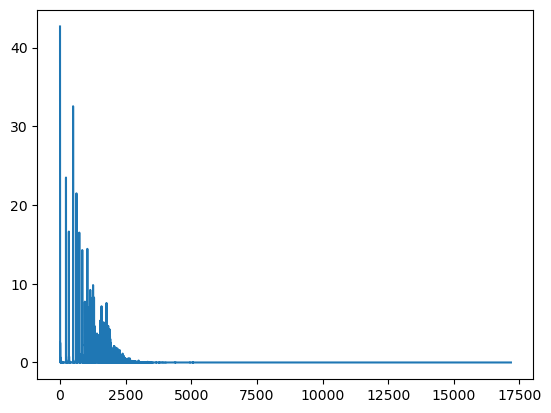

In [28]:
import matplotlib.pyplot as plt
plt.plot(df['stars'])

In [ ]:
starMass.shape
# This must be the 6 mass types. 
#PartType0 (Gas)
#PartType1 (DM)
#PartType3 (Tracers)
#PartType4 (Stars)
#PartType5 (BHs)

# so we want PartType4 so [] -lets just follow the tutorial before we move on.
# I think there is a way to get the particle data (PartType4) with the associated halo/galaxy

In [ ]:
starMass

In [ ]:
# Now, lets read the positions, velocities, masses, and lenghts of the halos
pos_h     = f['Group/GroupPos'][:]/1e3   #Mpc/h
vel_h     = f['Group/GroupVel'][:]       #km/s
SFR_h     = f['Group/GroupSFR'][:]       #Msun/yr
mass_h    = f['Group/GroupMass'][:]*1e10 #Msun/h
len_h     = f['Group/GroupLen'][:]       #the total number of particles in the halo (gas+dm+stars+black_holes)
lentype_h = f['Group/GroupLenType'][:]   #the number of particles in a halo by particle type
#f.close()

In [ ]:
# Lets print the position, velocity, mass and length of a given halo

index = 167 #index of the halo
print('position:',pos_h[index],'Mpc/h')
print('velocity:',vel_h[index],'km/s')
print('mass: %.3e Msun/h'%mass_h[index])
print('total length:',len_h[index],'particles')
print('number of particles by type:',lentype_h[index])


In [ ]:
# Now imagine we want to select the star mass particles that belong to this halo. 
# For this, we need to know where the particles start in the list. 
# This can be done as follows:

offset = np.sum(lentype_h[:index], axis=0) 
#this is the sum of the lengths of all FoF halos previous to the one we consider
offset

In [ ]:
#We can now read the particles in the snapshot and identify the ones in this halo as

f = h5py.File(f_snapshot, 'r')
print(f.keys())
# PartType4 is the one we want


In [ ]:
#Lets see what star mass properties do we have
print(f['PartType4'].keys())



In [ ]:
# The gas type properties would be PartType0
print(f['PartType0'].keys())


In [ ]:
# Now, lets read the positions, velocities, 
# and star formation rates of the gas particles in the above halo
# the gas particles of this halos will start at offset[0] and will contain lentype_h[0] particles
start = offset[0]
end   = offset[0]+lentype_h[index,0]
pos_gas = f['PartType0/Coordinates'][start:end]/1e3   #Mpc/h
vel_gas = f['PartType0/Velocities'][start:end]        #km/s
sfr_gas = f['PartType0/StarFormationRate'][start:end] #Msun/yr
#f.close()


#pos_dm = f['PartType1/Coordinates'][:]/1e3   #Mpc/h
#vel_dm = f['PartType1/Velocities'][:]        #km/s

In [ ]:
sfr_gas

In [ ]:
vel_gas

In [ ]:
pos_gas

In [ ]:
# test
# similarly lets rad the initial mass, photometrics and masses and velocities of the halo
start = offset[0]
end   = offset[0]+lentype_h[index,0]
iniMass_stars = f['PartType4/GFM_InitialMass'][:]
phot_stars = f['PartType4/GFM_StellarPhotometrics'][:]
mass_stars = f['PartType4/Masses'][:] #10^10𝑀⊙/ℎ
vel_stars = f['PartType4/Velocities'][:]        #km/s


In [ ]:
vel_stars

In [ ]:
mass_stars

In [ ]:
iniMass_stars

In [ ]:
phot_stars

In [ ]:
#Lets check if the positions of the particles are around the center of the halo


In [ ]:
import matplotlib.pyplot as plt
from pylab import *
fig = figure(figsize=(20,10))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
for ax in [ax1,ax2,ax3]:
    ax.set_aspect('equal')
    ax.set_xlim([0,25])
    ax.set_ylim([0,25])
ax1.scatter(pos_gas[:,0], pos_gas[:,1], s=0.1,c='r')
ax2.scatter(pos_gas[:,0], pos_gas[:,2], s=0.1,c='r')
ax3.scatter(pos_gas[:,1], pos_gas[:,2], s=0.1,c='r')
ax1.scatter(pos_h[index,0], pos_h[index,1], s=10, c='b')
ax2.scatter(pos_h[index,0], pos_h[index,2], s=10, c='b')
ax3.scatter(pos_h[index,1], pos_h[index,2], s=10, c='b')
# now make a zoom-in
ax4.scatter(pos_gas[:,0], pos_gas[:,1], s=0.1,c='r')
ax5.scatter(pos_gas[:,0], pos_gas[:,2], s=0.1,c='r')
ax6.scatter(pos_gas[:,1], pos_gas[:,2], s=0.1,c='r')
ax4.scatter(pos_h[index,0], pos_h[index,1], s=30, c='b')
ax5.scatter(pos_h[index,0], pos_h[index,2], s=30, c='b')
ax6.scatter(pos_h[index,1], pos_h[index,2], s=30, c='b')
plt.show()

In [ ]:
SFR1 = np.sum(sfr_gas)
print('SFR from the gas particles = %.3e Msun/yr'%SFR1)
print('SFR of the FoF group = %.3e Msun/yr'%SFR_h[index])

In [ ]:
mass_stars

In [ ]:
def calc_df(mstar, volume, massBinLimits):

    hist, dummy = np.histogram(np.log10(mstar), bins = massBinLimits)
    hist = np.float64(hist)
    phi = (hist / volume) / (massBinLimits[1] - massBinLimits[0])

    # p = 0.95
    # phi_sigma = np.array([scipy.stats.chi2.ppf((1.-p)/2.,2*hist)/2.,
    #                       scipy.stats.chi2.ppf(p+(1.-p)/2.,2*(hist+1))/2.])

    # phi_sigma = (phi_sigma / volume) / (massBinLimits[1] - massBinLimits[0])

    phi_sigma = (np.sqrt(hist) / volume) /\
                (massBinLimits[1] - massBinLimits[0]) # Poisson errors

    return phi, phi_sigma, hist

In [ ]:
vol = 25

# Assuming you want 10 equally spaced bins in log from 10^9 to 5 × 10^11
BinLim = np.logspace(9, np.log10(5e11), 11)
# The massBinLimits array will have 11 elements, defining the edges of 10 bins

phi, phi_sigma, hist = calc_df(mass_stars, vol, BinLim)
# The volume of the simulations is (25 h−1Mpc)3.

In [ ]:
hist

In [ ]:
phi

In [ ]:
phi_sigma

In [ ]:
f.close()